In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# **1. File Reading**


In [34]:
# Update this with your actual file path
file_path = "/content/Restaurant_dataset633300109.csv"
df = pd.read_csv(file_path)

# **2. Data Cleansing**

  ## **Filling Missing Values** ##

In [35]:
# Missing value count before cleaning
print("🔍 Missing values before cleaning:")
print(df.isnull().sum())

🔍 Missing values before cleaning:
unique_id         0
date            493
dish              0
cuisine           0
type              0
rating          508
price           943
cooking_cost    943
dtype: int64


In [36]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check missing values after coercion
print("\n🔍 Missing values after date conversion:")
print(df.isnull().sum())

# Drop rows with missing date
df = df.dropna(subset=['date'])
print(f"\n✅ Rows remaining after dropping missing dates: {len(df)}")

# Fill missing values for other columns
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)
df['cooking_cost'].fillna(df['cooking_cost'].mean(), inplace=True)

# Confirm no missing values remain
print("\n✅ Missing values after cleaning:")
print(df.isnull().sum())



🔍 Missing values after date conversion:
unique_id         0
date            493
dish              0
cuisine           0
type              0
rating          508
price           943
cooking_cost    943
dtype: int64

✅ Rows remaining after dropping missing dates: 11507

✅ Missing values after cleaning:
unique_id       0
date            0
dish            0
cuisine         0
type            0
rating          0
price           0
cooking_cost    0
dtype: int64


<ipython-input-36-d920542466a9>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mode()[0], inplace=True)
<ipython-input-36-d920542466a9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'].fillna(df['rating'].mode()[0], inplace=True)
<ipython-input-36-d920542466a9>:14: FutureWarning: A value is try

In [37]:
# Check how many completely duplicate rows exist
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [38]:
# Extract month in YYYY-MM format
df['month'] = df['date'].dt.to_period('M').astype(str)

# Count number of orders per month
monthly_orders = df['month'].value_counts().sort_index()

# Count number of orders per day
daily_order_counts = df['date'].value_counts().sort_index()

<ipython-input-38-c110b084e710>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.to_period('M').astype(str)


## **Information about the dataset** ##

In [39]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11507 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   unique_id     11507 non-null  int64         
 1   date          11507 non-null  datetime64[ns]
 2   dish          11507 non-null  object        
 3   cuisine       11507 non-null  object        
 4   type          11507 non-null  object        
 5   rating        11507 non-null  float64       
 6   price         11507 non-null  float64       
 7   cooking_cost  11507 non-null  float64       
 8   month         11507 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 899.0+ KB


,unique_id,date,dish,cuisine,type,rating,price,cooking_cost,month
0,140525184186832,2024-09-25,Lobster Soup,Soups,Appetizer,3.0,33.315531,18.537735,2024-09
1,140525184173200,2024-10-15,Lobster Soup,Soups,Appetizer,3.0,35.000000,16.790000,2024-10
2,140525184175376,2024-10-26,Lobster Soup,Soups,Appetizer,4.0,37.000000,15.000000,2024-10
3,140525184185488,2024-08-22,Lobster Soup,Soups,Appetizer,3.0,37.000000,23.450000,2024-08
4,140525184174480,2024-07-12,Lobster Soup,Soups,Appetizer,3.0,37.000000,20.740000,2024-07


## **Unique counts for all columns** ##

In [40]:

for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")


unique_id: 11507 unique values
date: 332 unique values
dish: 9 unique values
cuisine: 3 unique values
type: 2 unique values
rating: 5 unique values
price: 15 unique values
cooking_cost: 1140 unique values
month: 12 unique values


## **Show value counts for each categorical column** ##

In [41]:

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n🔹 Value counts for '{col}':")
    print(df[col].value_counts(dropna=False))



🔹 Value counts for 'dish':
dish
Mole Poblano         7032
Osso Buco            1926
Carnitas             1893
Lasagna               465
Lobster Soup           77
Tacos                  75
French Onion Soup      20
Margherita Pizza       17
Chicken Soup            2
Name: count, dtype: int64

🔹 Value counts for 'cuisine':
cuisine
MexicanDish    9000
ItalianDish    2408
Soups            99
Name: count, dtype: int64

🔹 Value counts for 'type':
type
MainCourse    11408
Appetizer        99
Name: count, dtype: int64

🔹 Value counts for 'month':
month
2024-12    2645
2024-11    2176
2024-10    1847
2024-09    1463
2024-08    1110
2024-07     834
2024-06     611
2024-05     411
2024-04     233
2024-03     128
2024-02      36
2024-01      13
Name: count, dtype: int64


## **Show stats for numeric columns** ##

In [42]:

df.describe()


,unique_id,date,rating,price,cooking_cost
count,1.150700e+04,11507,11507.000000,11507.000000,11507.000000
mean,1.405252e+14,2024-09-30 20:31:15.866863872,3.808551,33.315531,18.537735
min,1.405251e+14,2024-01-01 00:00:00,1.000000,25.000000,15.000000
25%,1.405251e+14,2024-08-18 00:00:00,3.000000,33.000000,16.420000
50%,1.405252e+14,2024-10-17 00:00:00,4.000000,34.000000,18.270000
75%,1.405252e+14,2024-11-27 00:00:00,5.000000,34.000000,20.000000
max,1.405267e+14,2024-12-31 00:00:00,5.000000,39.000000,29.000000
std,1.743020e+08,NaN,0.978264,1.937913,2.614258


# **📈 3. Visualizations**

---



## **1️⃣ Bar Chart – Dish Frequency** ##

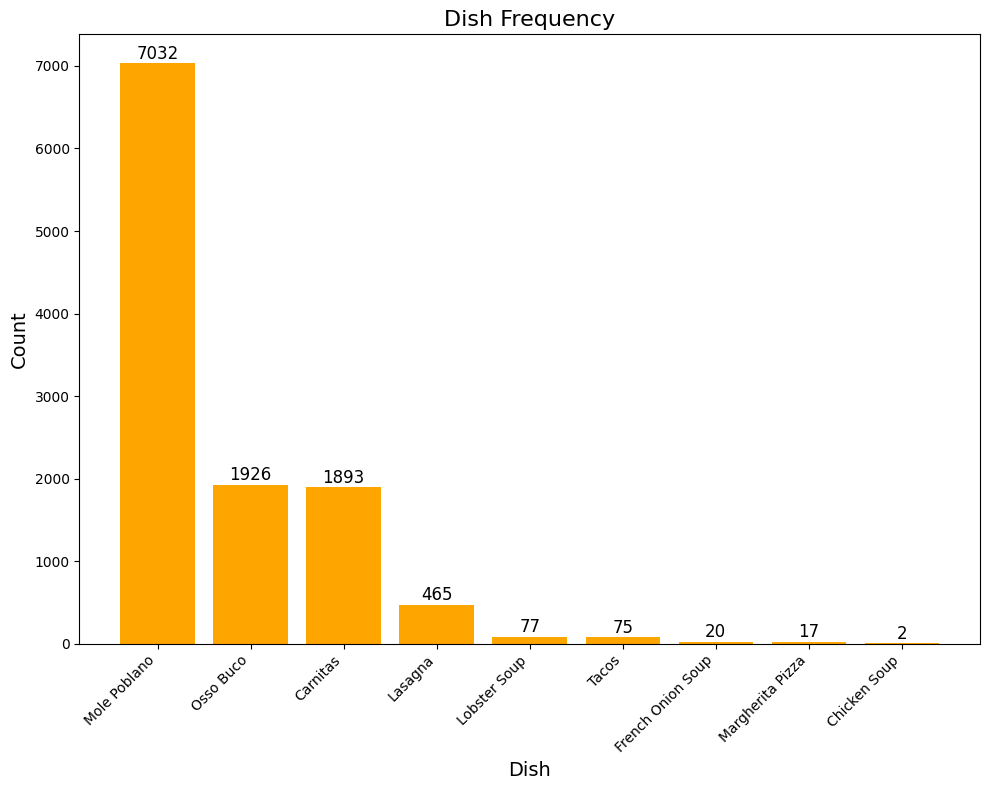

In [43]:
# Get value counts
dish_counts = df['dish'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 8))
bars = plt.bar(dish_counts.index, dish_counts.values, color='orange')

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (centered)
        height + 10,                        # Y position (just above the bar)
        f'{int(height)}',                   # Label text
        ha='center', va='bottom', fontsize=12
    )

plt.title('Dish Frequency', fontsize=16)
plt.xlabel("Dish", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **2️⃣ Boxplot – Price by Dish** ##

<ipython-input-44-9611eec843ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dish', y='price', data=df, palette='Set3')


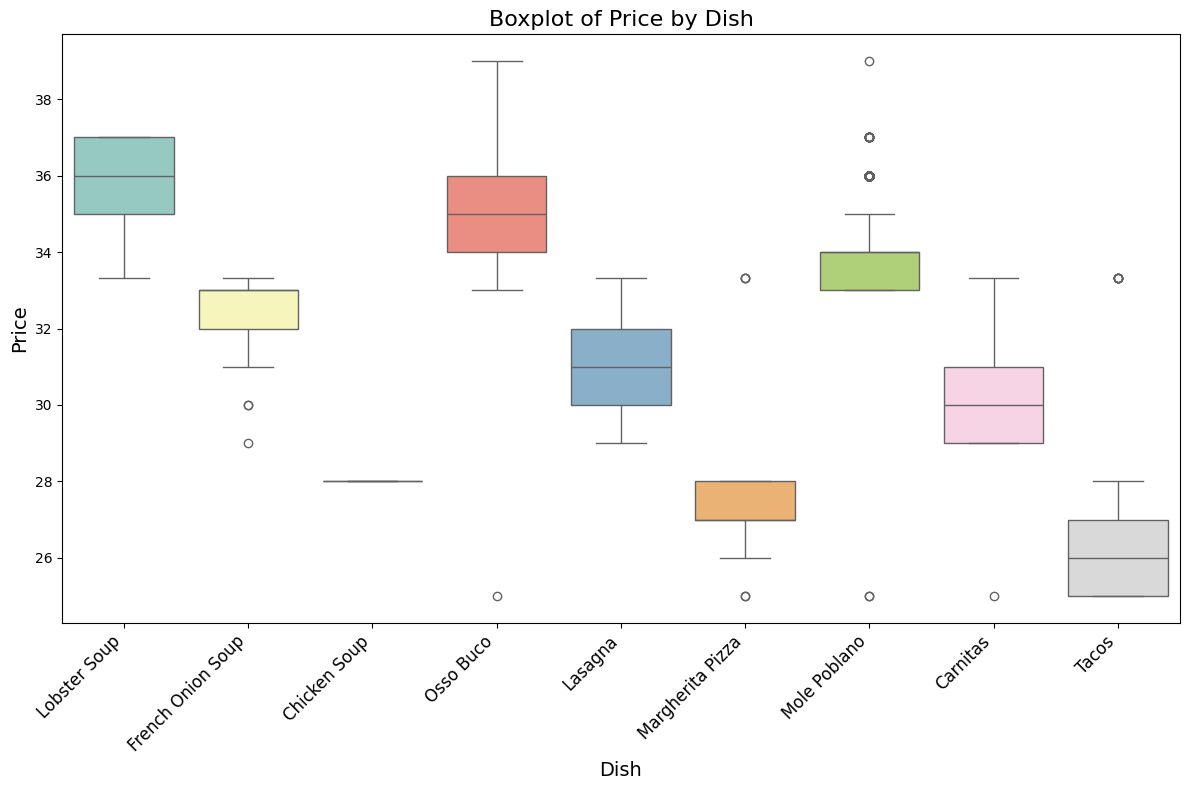

In [44]:
plt.figure(figsize=(12, 8))  # ⬅️ Increase the size of the plot
sns.boxplot(x='dish', y='price', data=df, palette='Set3')

plt.title('Boxplot of Price by Dish', fontsize=16)
plt.xlabel('Dish', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # ⬅️ Rotate labels for better readability
plt.tight_layout()
plt.show()

## **3️⃣ Line Plot – Price Over Time** ##

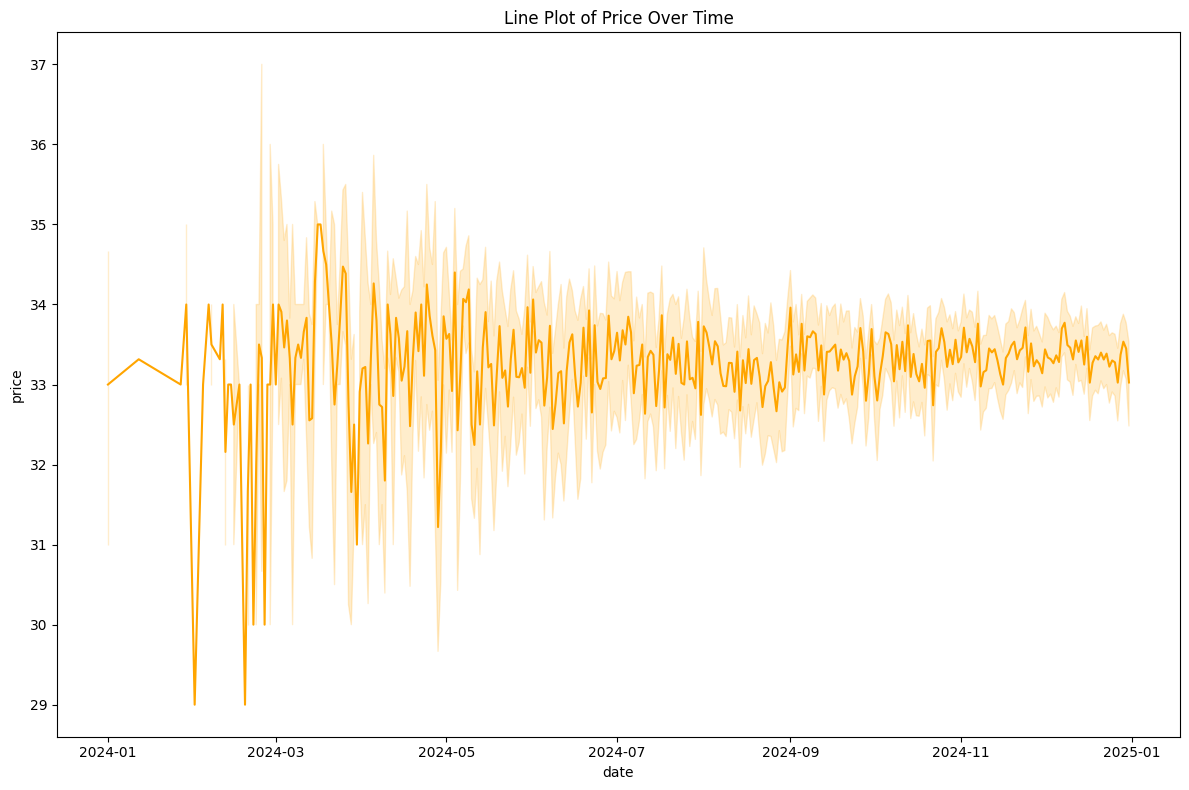

In [45]:
plt.figure(figsize=(12, 8))
df_sorted = df.sort_values(by='date')
sns.lineplot(x='date', y='price', data=df_sorted, color='orange')
plt.title('Line Plot of Price Over Time')
plt.tight_layout()
plt.show()


## **4️⃣ Scatter Plot – Profit vs. Price** ##

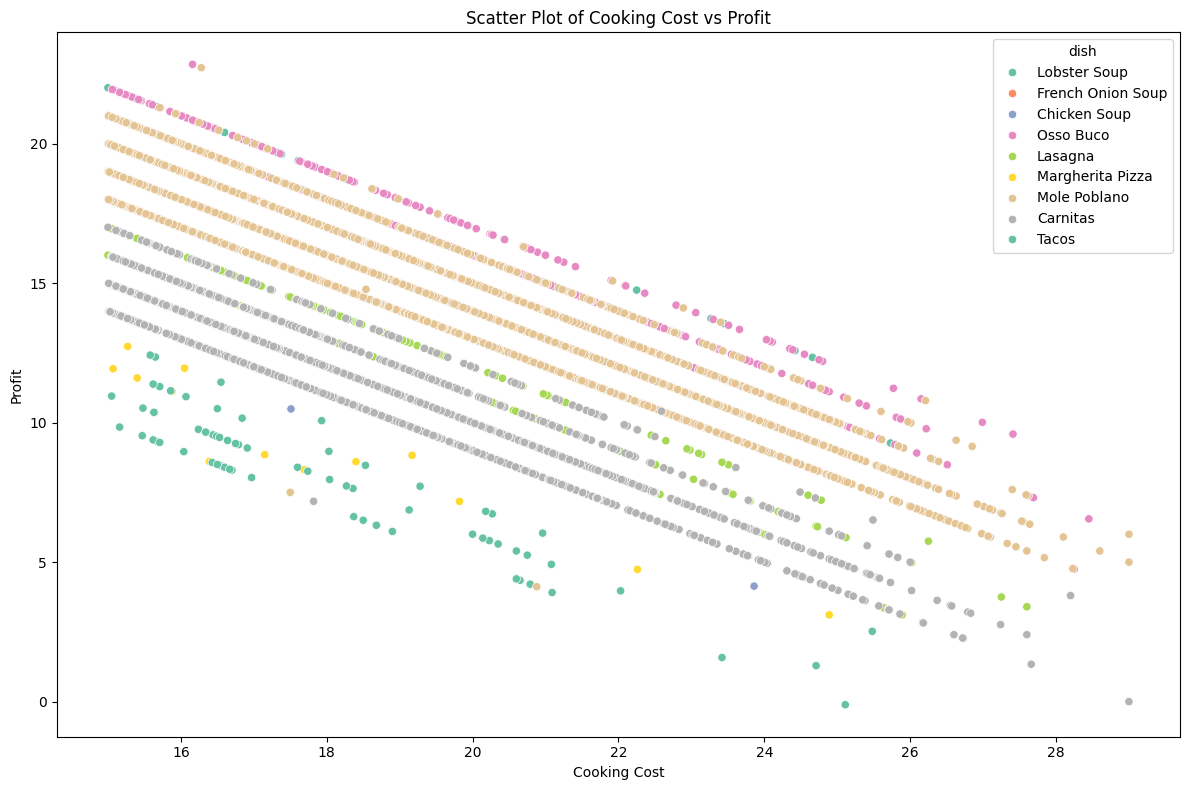

In [46]:

# Calculate profit
df['profit'] = df['price'] - df['cooking_cost']

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='cooking_cost', y='profit', hue='dish', data=df, palette='Set2')
plt.title('Scatter Plot of Cooking Cost vs Profit')
plt.xlabel('Cooking Cost')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()


## **5️⃣ Histogram – Price** ##

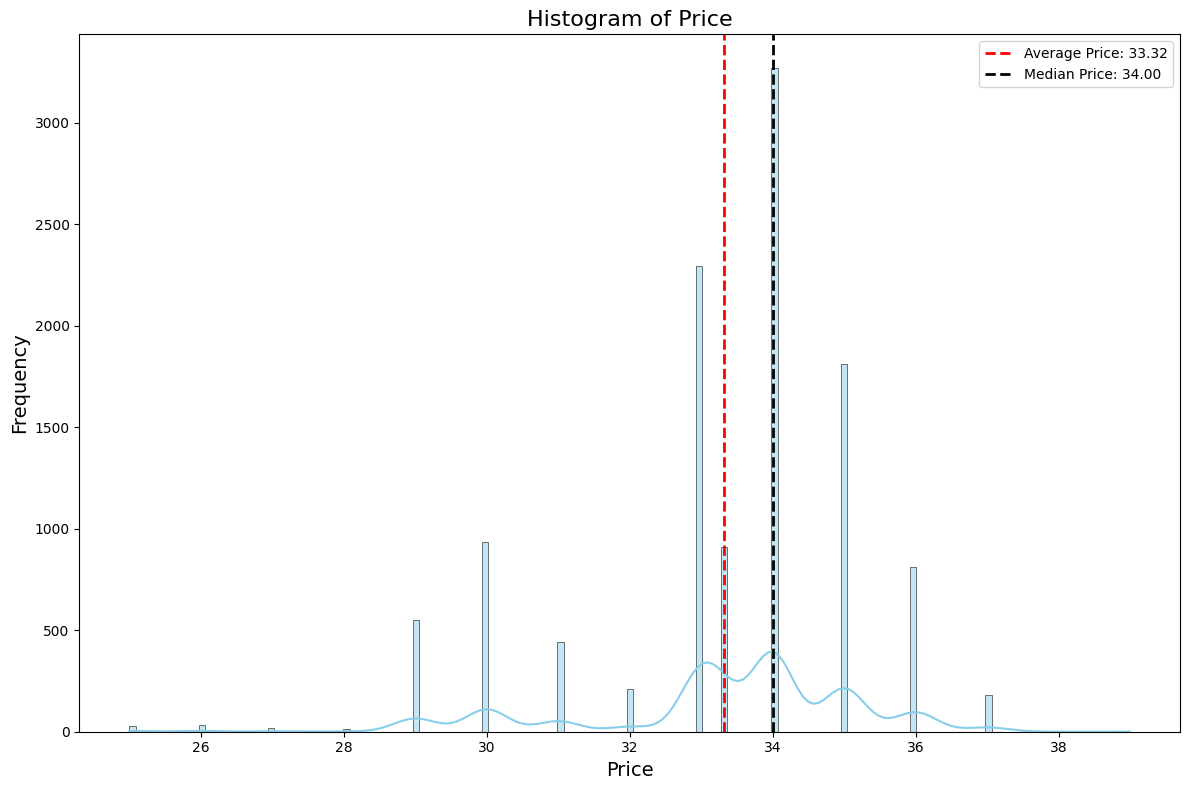

In [47]:
# Calculate the average price
average_price = df['price'].mean()

# Calculate the median price
median_price = df['price'].median()

# Create the histogram
plt.figure(figsize=(12, 8))
sns.histplot(df['price'], kde=True, color='skyblue')

# Add a vertical line for the average price
plt.axvline(average_price, color='red', linestyle='dashed', linewidth=2, label=f'Average Price: {average_price:.2f}')
# Add a vertical line for the median price
plt.axvline(median_price, color='black', linestyle='dashed', linewidth=2, label=f'Median Price: {median_price:.2f}')

# Customize the plot
plt.title('Histogram of Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-48-d8d61dc14d78>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price', data=df, order=df['price'].value_counts().index, palette='pastel')


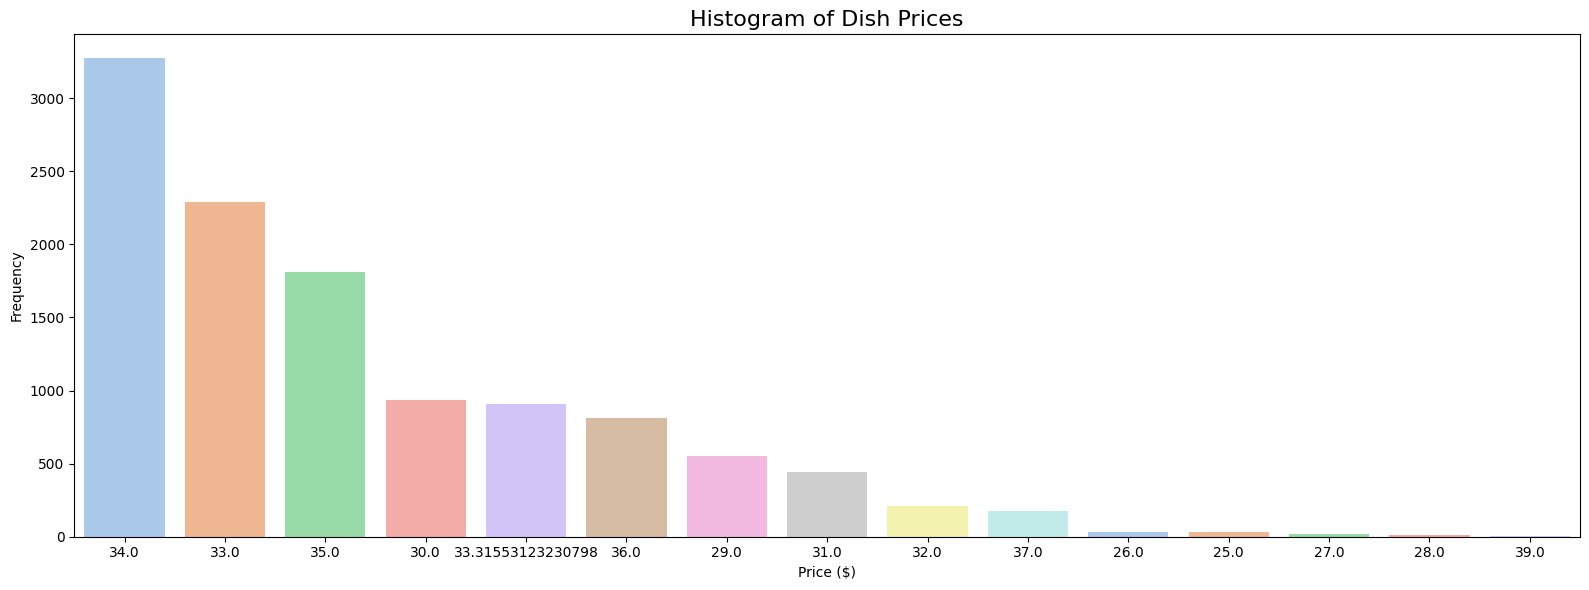

In [48]:

# Calculate the average price
average_price = df['price'].mean()


plt.figure(figsize=(16, 6))
sns.countplot(x='price', data=df, order=df['price'].value_counts().index, palette='pastel')
plt.title('Histogram of Dish Prices', fontsize=16)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## **6️⃣ Pie Chart – Dish Distribution** ##

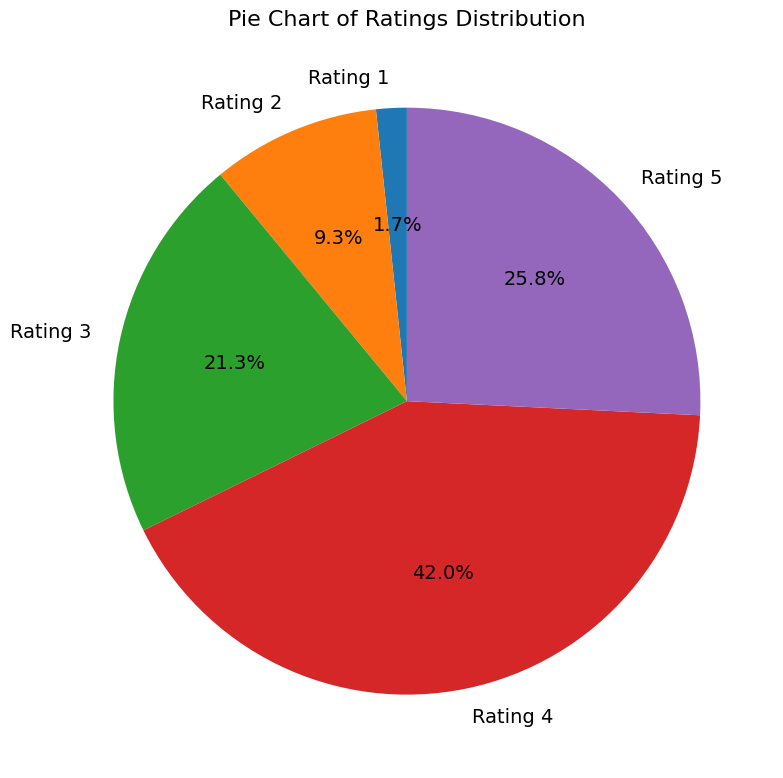

In [49]:
# Pie chart for rating (evenly spread)
rating_counts = df['rating'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(
    rating_counts,
    labels=[f'Rating {int(r)}' for r in rating_counts.index],
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 14}
)

plt.title('Pie Chart of Ratings Distribution', fontsize=16)
plt.tight_layout()
plt.show()


## **7️⃣ Heatmap of Dish vs. Rating** ##

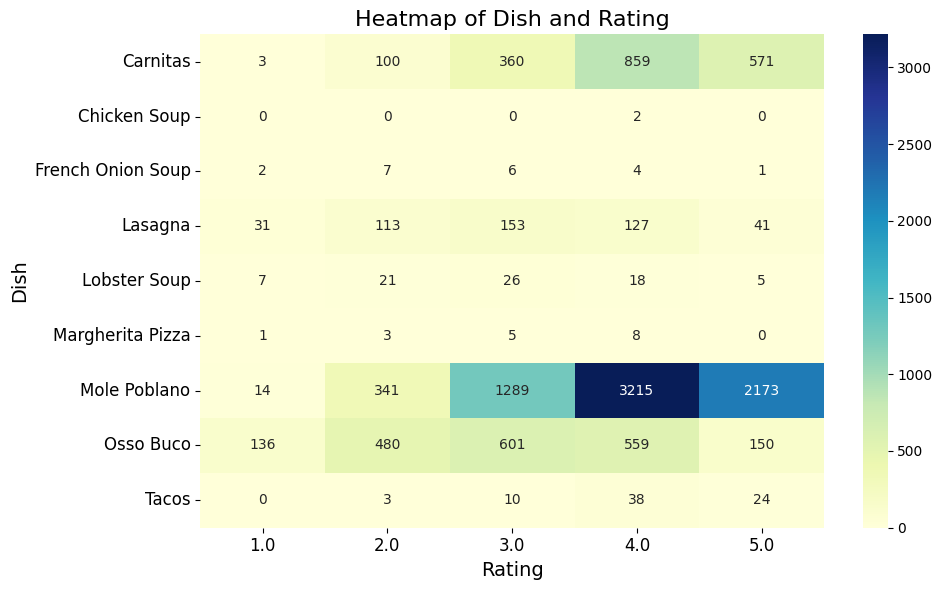

In [50]:
# Create a cross-tab (like a pivot table) of dish vs cuisine
heatmap_data = pd.crosstab(df['dish'], df['rating'])

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Heatmap of Dish and Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Dish', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

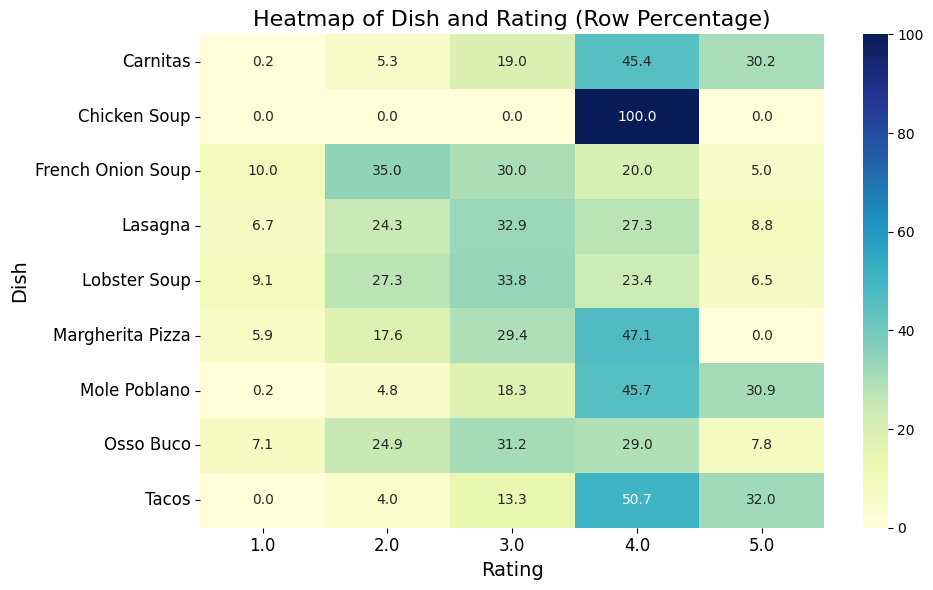

In [51]:
import matplotlib.pyplot as plt
# Calculate row percentages
heatmap_data_percentage = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_percentage, annot=True, fmt=".1f", cmap='YlGnBu')

plt.title('Heatmap of Dish and Rating (Row Percentage)', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Dish', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


## **Barplot of Dish vs. Rating** ##

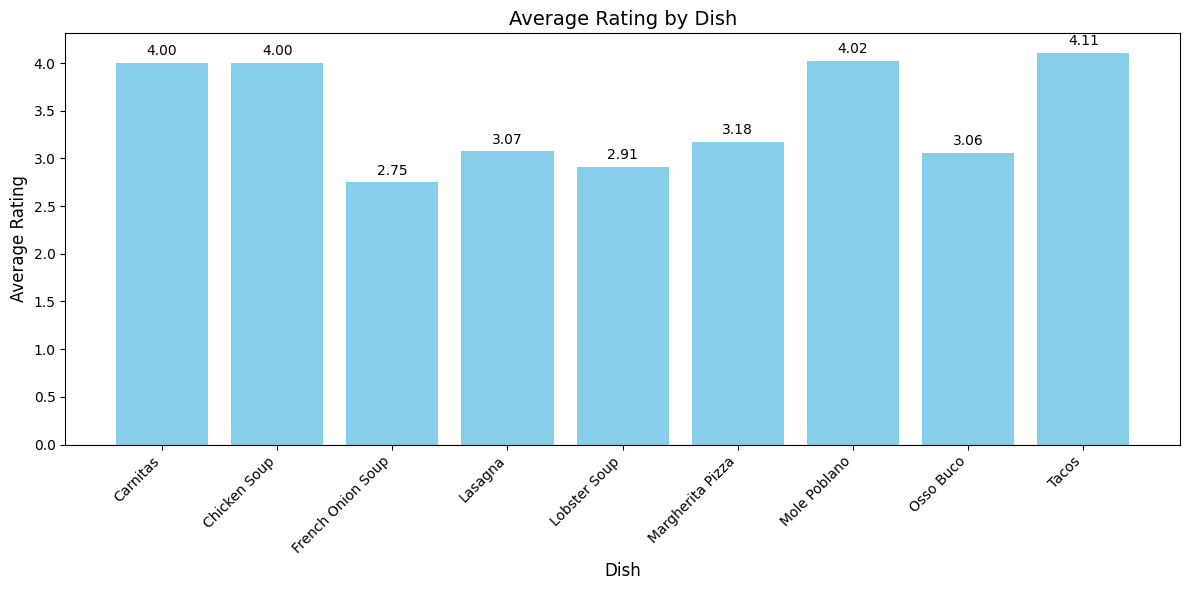

In [52]:

import matplotlib.pyplot as plt
# Calculate average rating for each dish
average_rating_by_dish = df.groupby('dish')['rating'].mean()

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(average_rating_by_dish.index, average_rating_by_dish.values, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.xlabel("Dish", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Average Rating by Dish", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


## **8️⃣ Line Plot of Monthly Restaurant Order Trend** ##

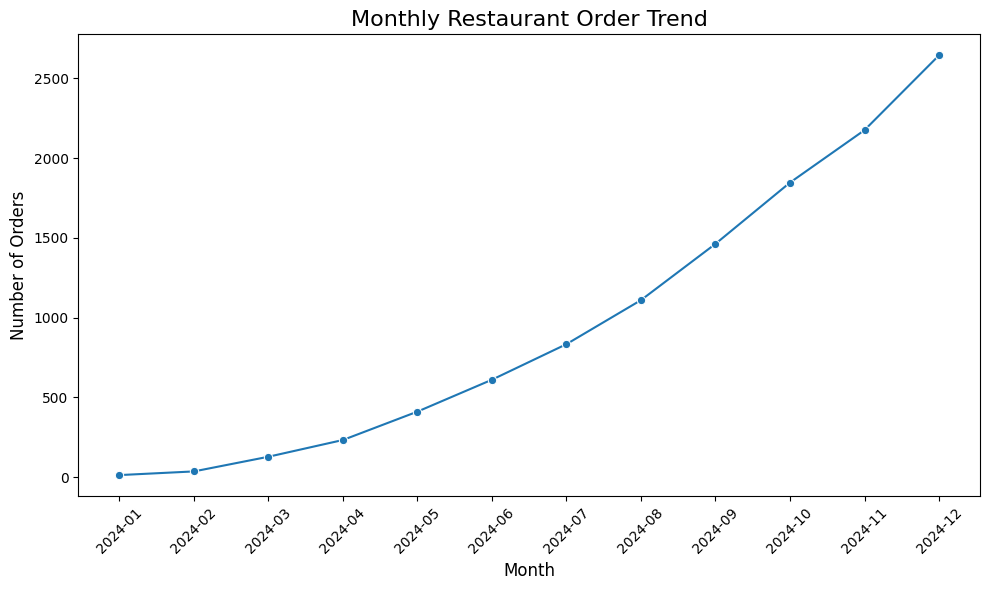

In [53]:
# Plotting the monthly trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_orders.index, y=monthly_orders.values, marker='o')

plt.title("Monthly Restaurant Order Trend", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()